In [97]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

import matplotlib.pyplot as plt

<a name="3.4"></a>
### Loading MNIST Dataset
The data set contains 5000 training examples of handwritten digits $^1$.  

    Each training example is a 20-pixel x 20-pixel grayscale image of the digit. 
        - Each pixel is represented by a floating-point number indicating the grayscale intensity at that location. 
        - The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector. 
        - Each training examples becomes a single row in our data matrix `X`. 
        - This gives us a 5000 x 400 matrix `X` where every row is a training example of a handwritten digit image.
    The second part of the training set is a 5000 x 1 dimensional vector `y` that contains labels for the training set
    `y = 0` if the image is of the digit `0`, `y = 4` if the image is of the digit `4` and so on.

In [98]:
X = np.load("DATA/X.npy")
y = np.load("DATA/y.npy")

### Splitting Data set
Using SK-Learns utility function to split dataset

In [99]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Visulazing MNIST Dataset
A function to visualize training and test data set
.The code randomly selects 64 rows from `X`, maps each row back to a 20 pixel by 20 pixel grayscale image and displays the images together. 
- The label for each image is displayed above the image 

In [100]:
#Visualizing Training Set
def Visualzing_MNIST(Dataset_Type):
    '''
    Dataset_Type: (String) : Specifying it's train or test
    '''
    import warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)
    # You do not need to modify anything in this cell
    X=X_train if Dataset_Type=='train' else X_test

    m, n = X.shape

    fig, axes = plt.subplots(8,8, figsize=(5,5))
    fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

    #fig.tight_layout(pad=0.5)
    # widgvis(fig)
    for i,ax in enumerate(axes.flat):
        # Select random indices
        random_index = np.random.randint(m)
        
        # Select rows corresponding to the random indices and
        # reshape the image
        X_random_reshaped = X[random_index].reshape((20,20)).T
        
        # Display the image
        ax.imshow(X_random_reshaped, cmap='gray')
        # Display the label above the image
        if Dataset_Type=="train":
            ax.set_title(y_train[random_index,0])
        elif Dataset_Type=="test":
            y_hat=y_pred[random_index]
            ax.set_title(f"{y_test[random_index,0]},{y_hat}",fontsize=10)
        ax.set_axis_off()
        fig.suptitle("Label, image", fontsize=14)



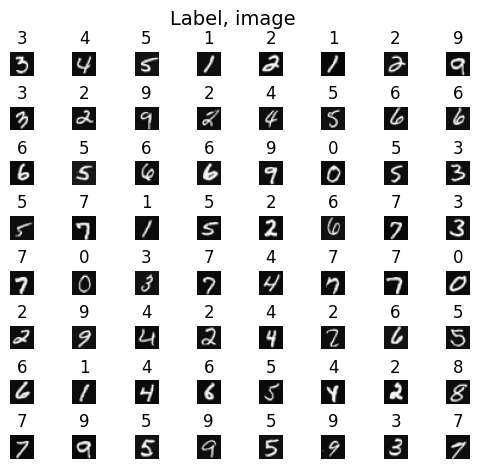

In [101]:
Visualzing_MNIST(Dataset_Type='train')

### Random Forest Classifier
Using SK Learn's RandomForestClassifier with depth 13.

In [102]:
rf = RandomForestClassifier(max_depth=13, random_state=0)
rf.fit(X_train, y_train)

C:\Users\hp\AppData\Local\Temp\ipykernel_9700\2356605076.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=13, random_state=0)

In [103]:
#Predicting on Test Data Set
y_pred = rf.predict(X_test)

Using SK learn's `classification_report` as error metric 

In [104]:
report = classification_report(y_test,y_pred)
print("Classification Report \n",report)

Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.98      0.96        98
           1       0.94      1.00      0.97        85
           2       0.93      0.91      0.92        89
           3       0.93      0.85      0.89       107
           4       0.87      0.95      0.91       102
           5       0.94      0.90      0.92       119
           6       0.96      0.93      0.94        91
           7       0.96      0.93      0.95       113
           8       0.89      0.89      0.89        93
           9       0.93      0.96      0.94       103

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000



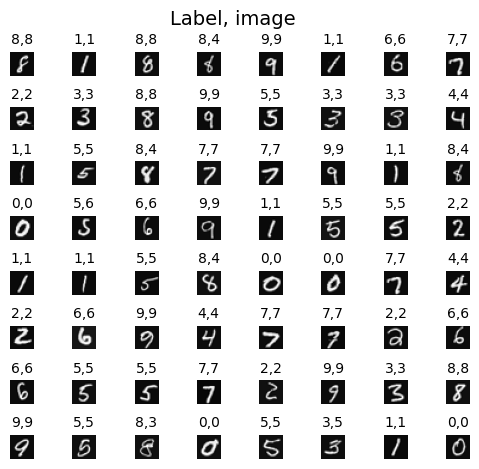

In [105]:
#Visualizing Test Set
Visualzing_MNIST(Dataset_Type='test')

### SVM Classification
Using SK Learn's `SVM`.

In [106]:
svc = svm.SVC(gamma='scale',class_weight='balanced',C=100)
svc.fit(X_train,y_train)


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100, class_weight='balanced')

In [107]:
y_pred=svc.predict(X_test)


In [108]:
report = classification_report(y_test,y_pred)
print("Classification Report \n",report)

Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98        98
           1       0.96      1.00      0.98        85
           2       0.95      0.94      0.95        89
           3       0.96      0.90      0.93       107
           4       0.93      0.99      0.96       102
           5       0.96      0.96      0.96       119
           6       0.98      0.95      0.96        91
           7       0.96      0.95      0.95       113
           8       0.98      0.96      0.97        93
           9       0.96      0.98      0.97       103

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



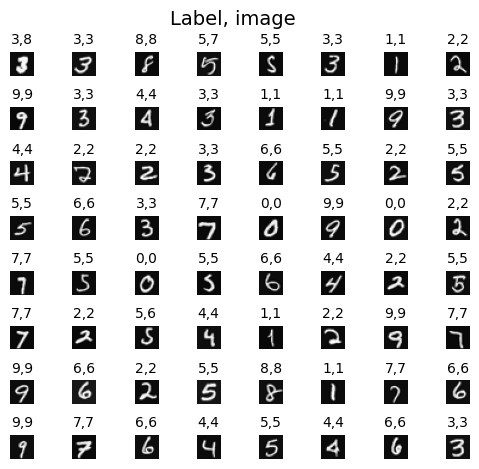

In [109]:
Visualzing_MNIST(Dataset_Type='test')

### KNN Classification
Using SK Learn's `KNeighborsClassifier`.

In [110]:
knn = KNeighborsClassifier(n_neighbors=2,weights='distance')
knn.fit(X_train, y_train)

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=2, weights='distance')

In [111]:
# Predict on dataset which model has not seen before
y_pred=knn.predict(X_test)

In [112]:
report = classification_report(y_test,y_pred)
print("Classification Report \n",report)

Classification Report 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        98
           1       0.92      1.00      0.96        85
           2       0.99      0.91      0.95        89
           3       0.93      0.89      0.91       107
           4       0.97      0.97      0.97       102
           5       0.96      0.89      0.93       119
           6       0.94      0.98      0.96        91
           7       0.93      0.95      0.94       113
           8       0.93      0.90      0.92        93
           9       0.88      0.95      0.92       103

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



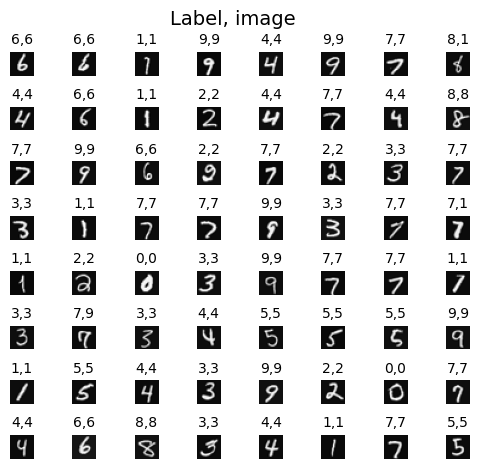

In [113]:
Visualzing_MNIST(Dataset_Type='test')